# Customer Churn Analysis-<br>
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.<br>

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. <br>

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


In [1]:
#importing Libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
#cheking first five rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#cheking last five rows of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Exploratory Data Analysis (EDA)

In [5]:
#checking columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
print("The shape of dataset is :",df.shape)

The shape of dataset is : (7043, 21)


In [7]:
df=df.drop_duplicates()
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns after dropping duplicates:  (7043, 21)


With the drop_duplicates option I am getting rid of all the duplicate values present in our dataset.but it seems w o not have any duplicate values present in our dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Using the info method we can see that  there is 1 column with float data type, 2 columns with integer data type and 17 columns that have object data type also we have no missing value present in our dataset.
TotalCharges is numerical column , but it here its showing object datatype so we will check its unique values and then conclude the reason.__Dropping 'customerID' column since I feel it is pretty much useless showing just a list of unique identifiers on each row without adding much insight into the prediction of our target label.__
<br> __We will try to spearate these columns into numeric and object datatypes for easier analysis.__

In [9]:
df=df.drop('customerID',axis=1)

In [10]:
categorical_cols= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        categorical_cols.append(x)
print(f"Object Data Type Columns are:\n", categorical_cols)

# getting the list of numeric data type column names
numerical_cols= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are:\n", numerical_cols)

Object Data Type Columns are:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Number Data Type Columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we have no null values present in the dataset that means we can proceed further.

In [12]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Using the describe method to check the numerical data details. There are only 3 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points showing no abnormality as such.

In [13]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I am using the describe method along with it's parameter all to include all the columns present in our dataset irrespective of them being numeric or text data. I have also used to the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple data.


In [14]:
df.nunique().to_frame("Unique Values")


,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


With the usage of nunique method we can see the total number of unique values present in all the columns.


__Exploring unique values in each categorical column__


In [15]:
for col in categorical_cols:
    print(col)
    print(df[col].value_counts())
    print("="*50)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: T

Checking the number of rows covered by all the unique values present in our object data type columns. It looks like all the columns have proper categories but the column "TotalCharges" has float value still gets tagged as object data type plus 11 rows of that column has blank data. We will need to fix this before we proceed with any further analysis.

In [16]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [17]:
## replacing white space/blank data with the nan values
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [18]:
df['TotalCharges'].isnull().sum()

11

In [19]:
#converting datatype from object to float
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

As datatype got converted , we can handle the missing value ,we will replace nan values by mean of the column as it has continous values.

In [20]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [21]:
#filling the nan values with mean of the column
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [22]:
df['TotalCharges'].isnull().sum()

0

successfully hanlded the whtespace present in the column.Similarly I am converting the column "SeniorCitizen" from numeric data type to object datatype as it contains categorical information and it will be easier to process it like a category with the other. Having said that we will convert it back using encoding technique later on before we initiate our model building process

In [23]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['SeniorCitizen'].dtype

dtype('O')

In [24]:
categorical_cols= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        categorical_cols.append(x)
print(f"Object Data Type Columns are:\n", categorical_cols)

# getting the list of numeric data type column names
numerical_cols= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are:\n", numerical_cols)

Object Data Type Columns are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


now we got every column at the right place depending on its datatype

## Visualization

Male      3555
Female    3488
Name: gender, dtype: int64


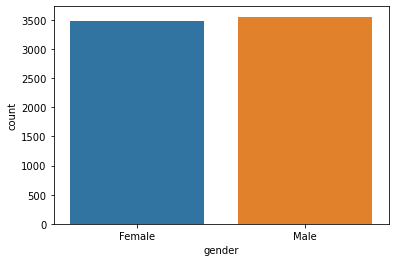

In [25]:
ax=sns.countplot(x='gender',data=df[categorical_cols])
print(df['gender'].value_counts())

from above bservation, total number of male is 3555 and female is 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


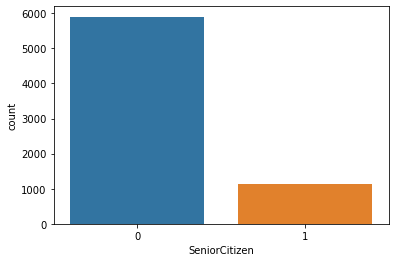

In [26]:
ax=sns.countplot(x='SeniorCitizen',data=df[categorical_cols])
print(df['SeniorCitizen'].value_counts())

Number of young custmers are higher than senior citizen in our dataset.

No     3641
Yes    3402
Name: Partner, dtype: int64


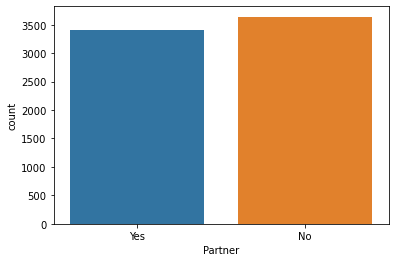

In [27]:
ax=sns.countplot(x='Partner',data=df[categorical_cols])
print(df['Partner'].value_counts())

In the above count plot we can see that the partner details are almost similar indicating that people with no partner are a bit higher than people who have partners.

No     4933
Yes    2110
Name: Dependents, dtype: int64


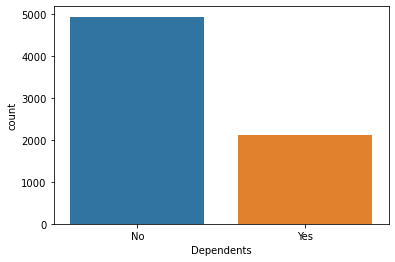

In [28]:
ax=sns.countplot(x='Dependents',data=df[categorical_cols])
print(df['Dependents'].value_counts())

In the above count plot we can see that people with dependents are way less that people who do not have anyone dependent on them.


Yes    6361
No      682
Name: PhoneService, dtype: int64


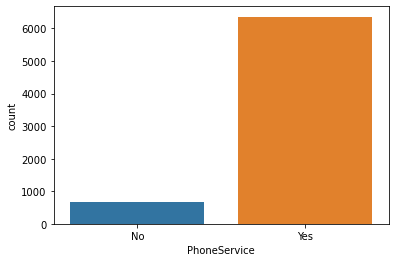

In [29]:
ax=sns.countplot(x='PhoneService',data=df[categorical_cols])
print(df['PhoneService'].value_counts())

In the above count plot we can see that people with a phone service cover a large data chunk while there are only few people who do not own a phone service.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


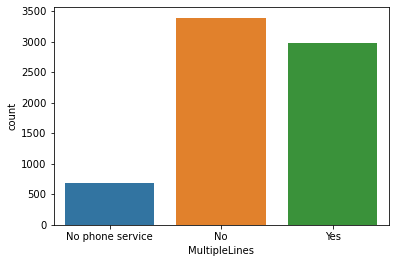

In [30]:
ax=sns.countplot(x='MultipleLines',data=df[categorical_cols])
print(df['MultipleLines'].value_counts())

In the above count plot we can see that people with single line are higher in number than people who have multiple lines but we also see a minority of people who do not own a phone service yet.



Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


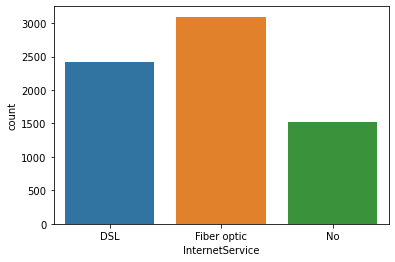

In [31]:
ax=sns.countplot(x='InternetService',data=df[categorical_cols])
print(df['InternetService'].value_counts())

In the above count plot we can see that majority of people have chosen to get a high speed fibre optic internet but there are many people who do not own an internet service at all

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


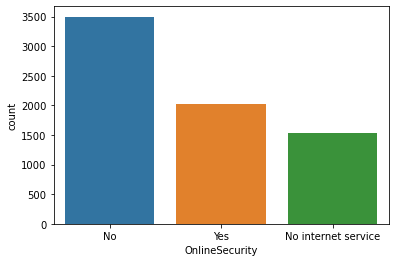

In [32]:
ax=sns.countplot(x='OnlineSecurity',data=df[categorical_cols])
print(df['OnlineSecurity'].value_counts())

In the above count plot we can see that people who do not have any internet service obviously do not need any online security either but there is a huge number in people who own an internet service but do not use any online security yet.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


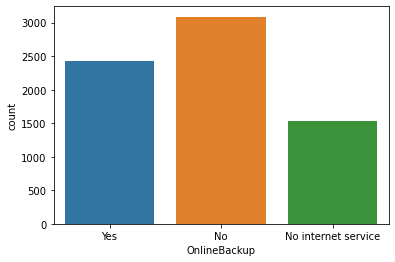

In [33]:
ax=sns.countplot(x='OnlineBackup',data=df[categorical_cols])
print(df['OnlineBackup'].value_counts())

No OnliIn the above count plot we can see that just like people with no internet service and online security the same chunk of folks have no online backup usage either. But the difference between people who use internet and do not have online backup vs people who use online back up is relatively lesser as compared to online security details.neBackup highest than anyother category

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


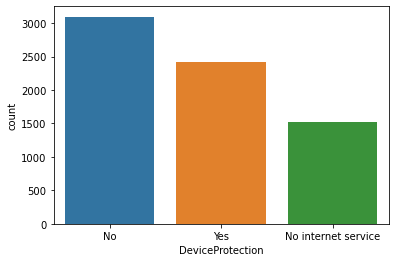

In [34]:
ax=sns.countplot(x='DeviceProtection',data=df[categorical_cols])
print(df['DeviceProtection'].value_counts())

In the above count plot we can see that people without any device protection is higher in number as compared to people who have some kind of device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


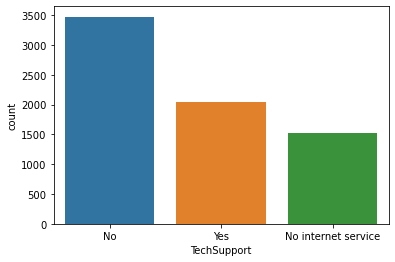

In [35]:
ax=sns.countplot(x='TechSupport',data=df[categorical_cols])
print(df['TechSupport'].value_counts())

In the above count plot we can see that people who do not need technical support is higher in number as compared to people who need technical assistance.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


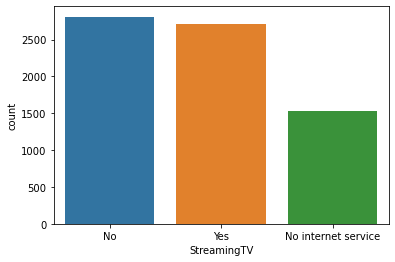

In [36]:
ax=sns.countplot(x='StreamingTV',data=df[categorical_cols])
print(df['StreamingTV'].value_counts())

In the above count plot we can see that people who do not use streaming TV service is slightly higher than the people who do use streaming TV service.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


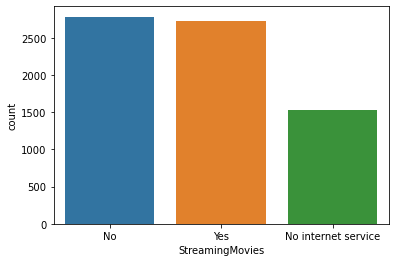

In [37]:
ax=sns.countplot(x='StreamingMovies',data=df[categorical_cols])
print(df['StreamingMovies'].value_counts())

In the above count plot we can see that just like streaming TV service there are people who do not stream movies a slight higher than people who do enjoy streaming movies online.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


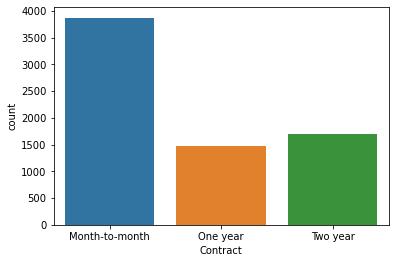

In [38]:
ax=sns.countplot(x='Contract',data=df[categorical_cols])
print(df['Contract'].value_counts())

In the above count plot we can see that there are a lot of people who prefer the month to month contract over the 1 year or 2 year contract term.


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


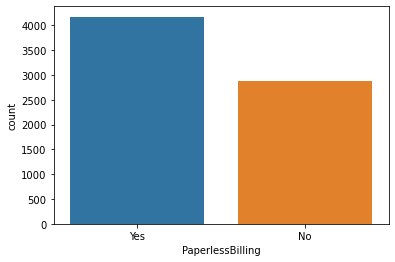

In [39]:
ax=sns.countplot(x='PaperlessBilling',data=df[categorical_cols])
print(df['PaperlessBilling'].value_counts())

In the above count plot we can see that people who prefer paper less billing are high in number however we still have a huge number of people who prefer the traditional way of receiving a paper bill.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


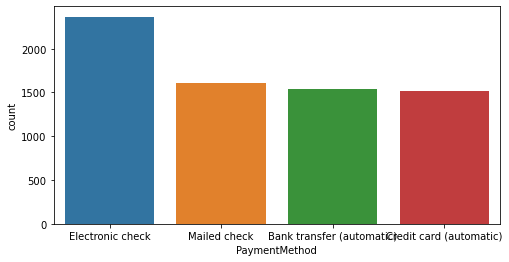

In [40]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='PaymentMethod',data=df[categorical_cols])
print(df['PaymentMethod'].value_counts())

In the above count plot we can see that the preferred payment amount by people is the electronic check. While people using the mailed check, automatic bank transfer and automatic credit card debit option fall in a similar range of numbers

No     5174
Yes    1869
Name: Churn, dtype: int64


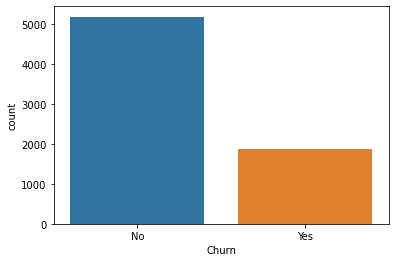

In [41]:
ax=sns.countplot(x='Churn',data=df[categorical_cols])
print(df['Churn'].value_counts())

__Exploring continus columns__

0.2395397495619829


<AxesSubplot:xlabel='tenure', ylabel='Density'>

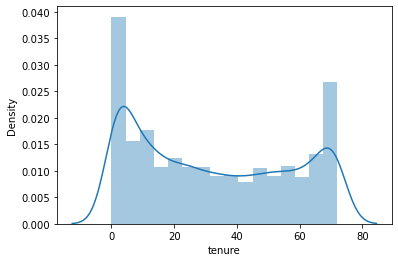

In [42]:
print(df['tenure'].skew())
sns.distplot(df['tenure'],kde=True)


Skewness is in acceptable range

-0.22052443394398033


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

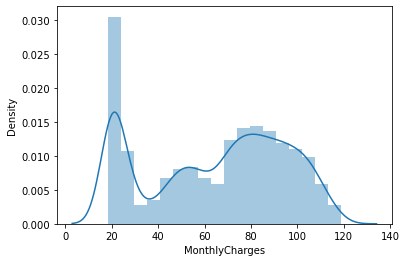

In [43]:
print(df['MonthlyCharges'].skew())
sns.distplot(df['MonthlyCharges'],kde=True)


Skewness is in acceptable range

0.9623940229874866


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

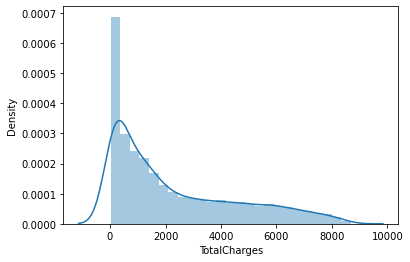

In [44]:
print(df['TotalCharges'].skew())
sns.distplot(df['TotalCharges'],kde=True)

Skewness found will fix this later in the project

__Bivariate Ananlysis__

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

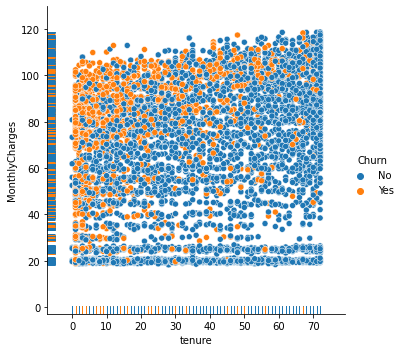

In [45]:
sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retension on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

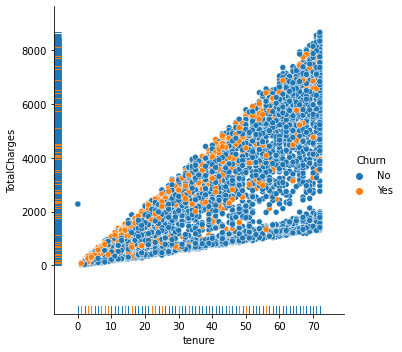

In [46]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

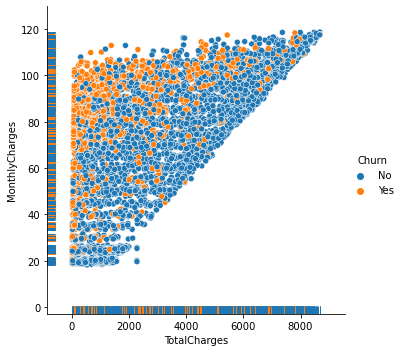

In [47]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

In [51]:
##sns.catplot(data=df, x='churn', y='MonthlyCharges')


## Encoding the categorical object datatype columns

In [52]:
from sklearn.preprocessing import LabelEncoder


In [53]:
le=LabelEncoder()


In [54]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


__Sucessfully Cnverted Object Datatype into int datatype__<br>
Checking for nan values after applying transformation technique.

In [56]:
df.isna().sum().sum()


0

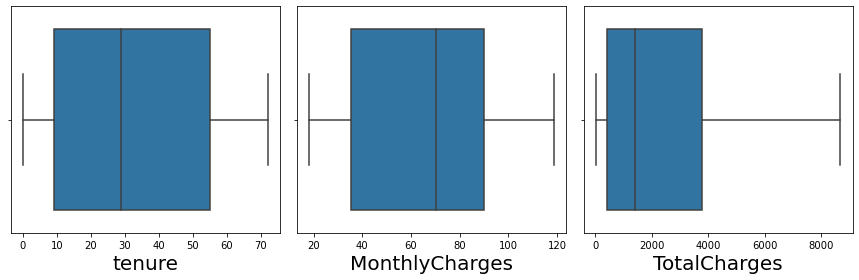

In [57]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df[numerical_cols]:
    if plot_number<=20: 
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()


With the usage of box plot we tried to check for outliers in our continous data columns and we found no outliers in them.

In [58]:
df.skew()


gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value. However most of those are categorical columns and we do not have to worry about outliers or skewness in catagorical data therefore we will ignore it. Having said that we will treat the skewness that is present in our continous data columns.ers in categorical column we won't have to fix any outlier concerns in our dataset.

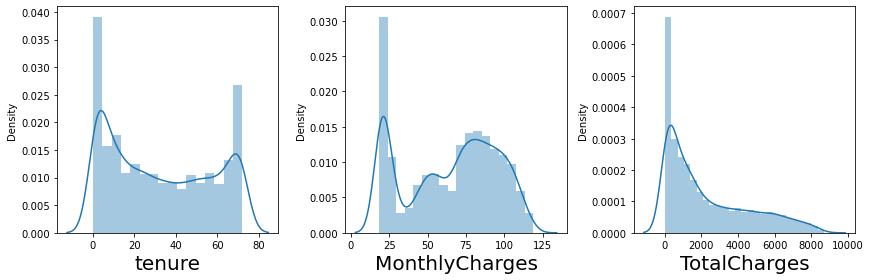

In [59]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df[numerical_cols]:
    if plot_number<=20: 
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()


In the above distribution plot we can see that our continous data columns have some skewness that will need to be treated and reduced to cover up an acceptable range in data values.

## Using Log Transform to fix skewness

In [61]:
for col in numerical_cols:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [62]:
df[numerical_cols].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.745402
dtype: float64

Here we have handled the skewness in continous data.

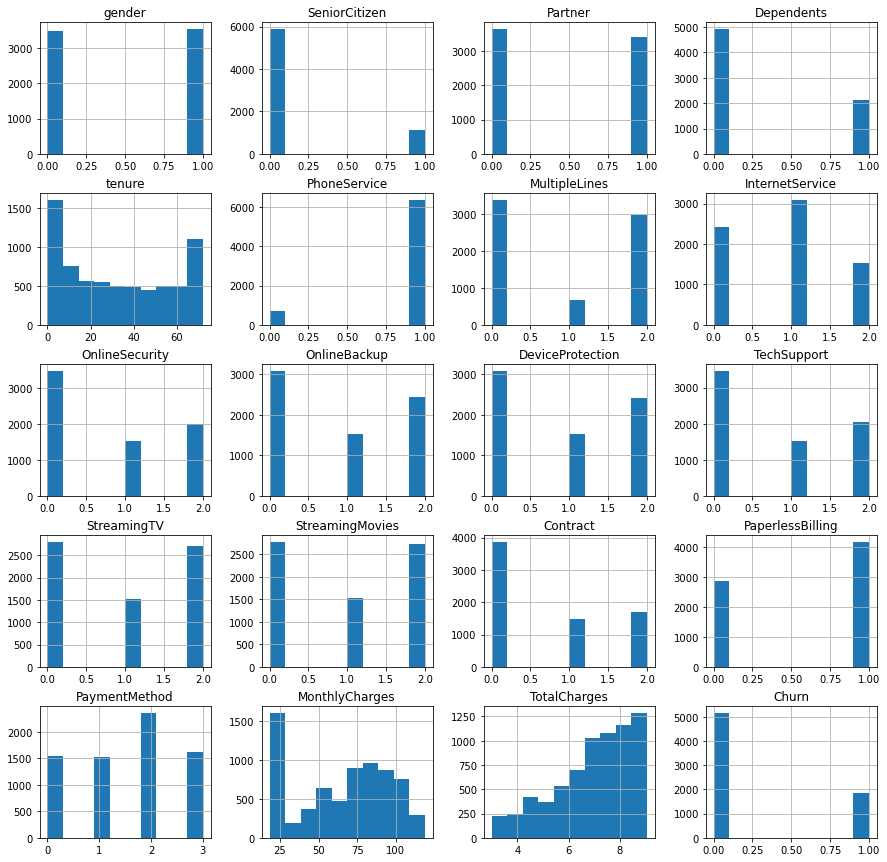

In [63]:
df.hist(figsize=(15,15))
plt.show()

I have generated a histogram for all our dataset columns after applying enconding technique and converting all object datatype columns to numeric datatype values<br>

## Correlation using a Heatmap

In [64]:
df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.006096,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.100451,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.339167,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.095558,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.831575,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.072660,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.436756,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.204113,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.222338,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.310616,-0.195525


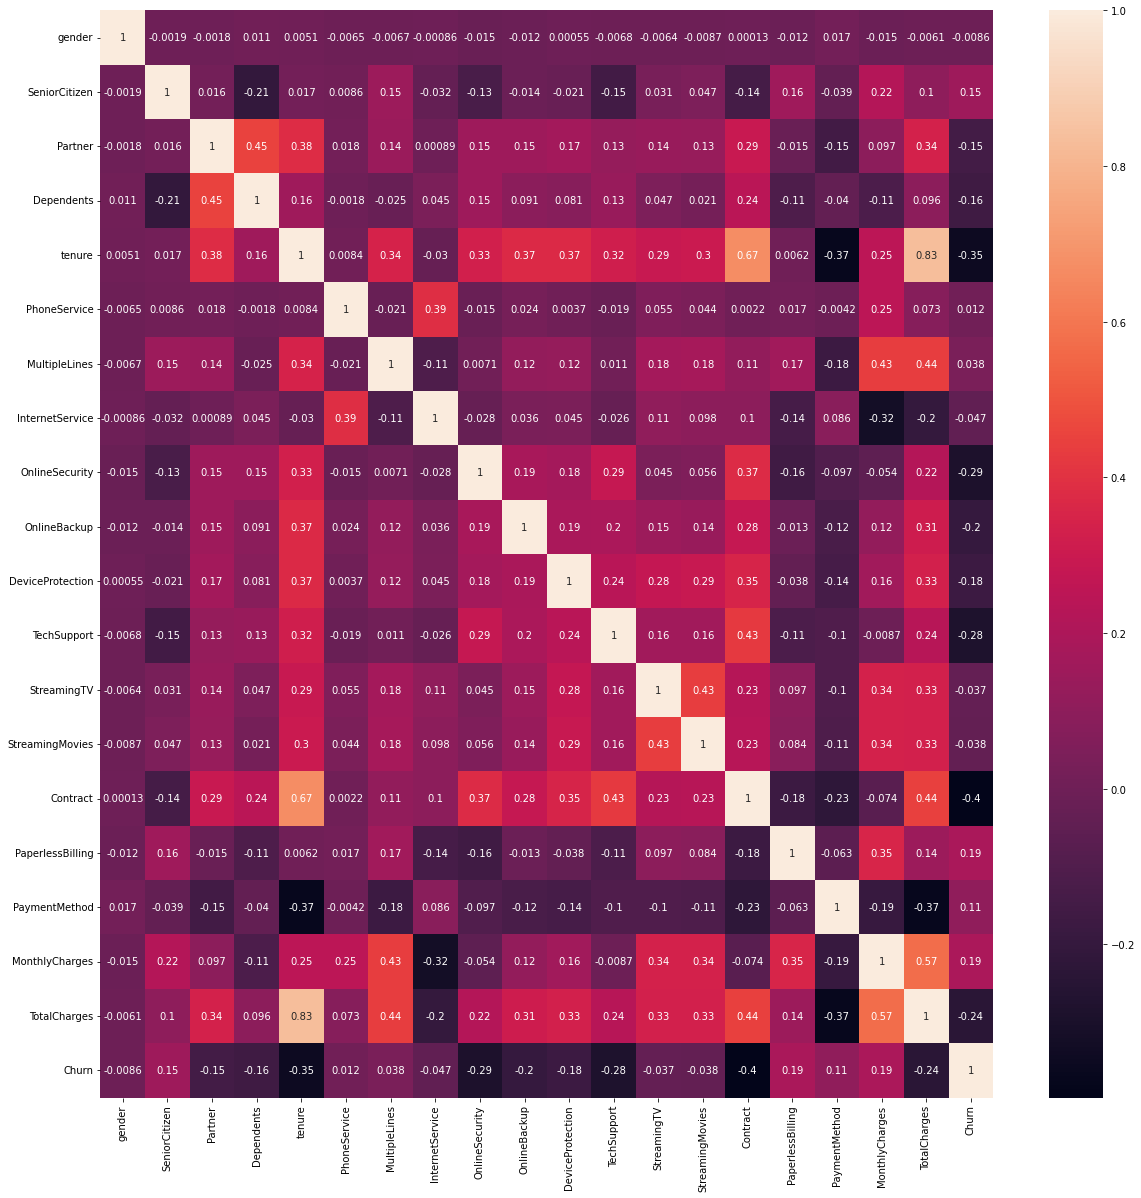

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns.

## Correlation Bar Plot comparing features with our label


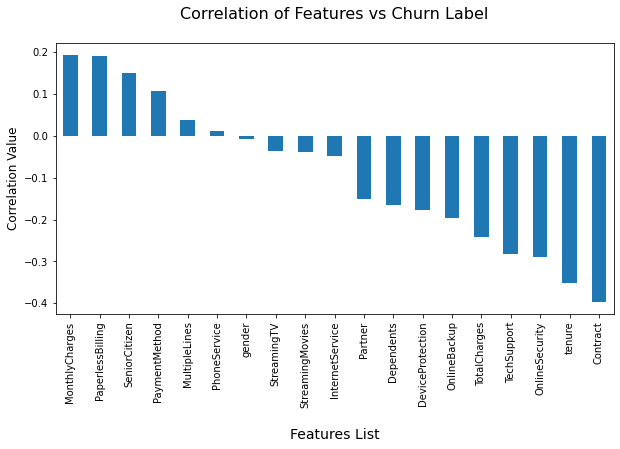

In [66]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Churn Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that columns monthly charges, paperless billing, senior citizen, payment method, multiple lines and phone service are positively correlated with our target label churn while all the remaining features are negatively correlated with our label column.

## Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [67]:
x=df.drop('Churn',axis=1)
y=df['Churn']

## Resolving the class imbalance issue in our label column

In [68]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
sm=SMOTE()

In [71]:
x,y = sm.fit_resample(x,y)

In [72]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

## Scaling the feature

In [73]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.88986599, -0.41125835,  1.25899214, ...,  0.42449364,
        -1.33251084, -2.08234594],
       [ 1.12376472, -0.41125835, -0.79428614, ...,  1.42669766,
        -0.39011561,  0.4909917 ],
       [ 1.12376472, -0.41125835, -0.79428614, ...,  1.42669766,
        -0.49791728, -1.29224365],
       ...,
       [ 1.12376472, -0.41125835, -0.79428614, ..., -1.57991439,
        -1.68391583,  0.12563903],
       [-0.88986599, -0.41125835, -0.79428614, ..., -0.57771037,
        -0.96117088, -0.87430051],
       [-0.88986599, -0.41125835,  1.25899214, ...,  0.42449364,
         1.28233627,  1.30994307]])

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV 

## Finding best random state for building our Classification Models

In [75]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print('Best score:',maxAcc)
print('Random State:',rs)

Best score: 0.8163896405102435
Random State: 60


In [76]:
#Let us split the data now at that random state
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=60)

In [77]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (7761, 19)
Size of x_test : (2587, 19)
Size of x_train : (7761,)
Size of x_train : (2587,)


## Machine Learning Model for Classification with Evaluation Metrics

In [78]:
def classify(clf, X,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=868)
    
    # Training the model
    clf.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = clf.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))
    print("Accuracy Score:", acc_score)
    
     #confusion matrix:
    print('confusion matrix:\n',confusion_matrix(y_test,pred))
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    
    
    # Cross Validation Score
    cv_score = (cross_val_score(clf, X, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

## LogisticRegression

In [79]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy Score: 0.7939698492462312
confusion matrix:
 [[ 966  315]
 [ 218 1088]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1281
           1       0.78      0.83      0.80      1306

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.79      2587
weighted avg       0.80      0.79      0.79      2587

Cross Validation Score: 0.7912690907647513

Accuracy Score - Cross Validation Score is 0.0027007584814798813


## DecisionTreeClassifier

In [80]:
clf=DecisionTreeClassifier()
classify(clf, X, y)

Accuracy Score: 0.7908774642442984
confusion matrix:
 [[1011  270]
 [ 271 1035]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1281
           1       0.79      0.79      0.79      1306

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

Cross Validation Score: 0.7876956124805327

Accuracy Score - Cross Validation Score is 0.0031818517637657306


## RandomForestClassifier

In [81]:
clf=RandomForestClassifier()
classify(clf, X, y)

Accuracy Score: 0.8496327792810204
confusion matrix:
 [[1074  207]
 [ 182 1124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1281
           1       0.84      0.86      0.85      1306

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587

Cross Validation Score: 0.8494479584760544

Accuracy Score - Cross Validation Score is 0.00018482080496606823


## SVC

In [82]:
clf= SVC()
classify(clf, X, y)

Accuracy Score: 0.8190954773869347
confusion matrix:
 [[ 995  286]
 [ 182 1124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1281
           1       0.80      0.86      0.83      1306

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

Cross Validation Score: 0.812048808848355

Accuracy Score - Cross Validation Score is 0.0070466685385797145


## KNeighborsClassifier

In [83]:
clf=KNeighborsClassifier()
classify(clf,X, y)

Accuracy Score: 0.7870119829918825
confusion matrix:
 [[ 900  381]
 [ 170 1136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.77      1281
           1       0.75      0.87      0.80      1306

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

Cross Validation Score: 0.7869210311873224

Accuracy Score - Cross Validation Score is 9.0951804560091e-05


## XGB

In [84]:
import xgboost as xgb

In [85]:
clf=xgb.XGBClassifier()

classify(clf, X,y)


Accuracy Score: 0.8384228836490143
confusion matrix:
 [[1053  228]
 [ 190 1116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1281
           1       0.83      0.85      0.84      1306

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587

Cross Validation Score: 0.8362105430287917

Accuracy Score - Cross Validation Score is 0.002212340620222575


In [86]:
clf=GradientBoostingClassifier()

classify(clf, X,y)

Accuracy Score: 0.8252802473908002
confusion matrix:
 [[1000  281]
 [ 171 1135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      1281
           1       0.80      0.87      0.83      1306

    accuracy                           0.83      2587
   macro avg       0.83      0.82      0.82      2587
weighted avg       0.83      0.83      0.82      2587

Cross Validation Score: 0.815624248452542

Accuracy Score - Cross Validation Score is 0.009655998938258192


## From the above evaulaution Metrics , we can clearly see that RandomForestClassifier is giving best f1 score and least difference between accuracy score and CV score so selecting RandomForestClassifier as our final model

In [88]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.8693467336683417
Confusion Matrix
 [[1103  198]
 [ 140 1146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1301
           1       0.85      0.89      0.87      1286

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587



## Hyper parameter tuning on RandomForestClassifier

In [89]:
from sklearn.model_selection import GridSearchCV

par={'n_estimators':range(100,500,100),'criterion':['gini','entropy'],'max_depth':range(0,10,5),'min_samples_split':range(2,20,4),
     'min_samples_leaf':range(1,5),'max_features':['auto']}

grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto

[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.1s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=0, max_featur

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   1.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   2.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   3.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   3.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   2.7s
[CV] END criterion=gini, max_depth=5, max_features=auto

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=300; total time=   1.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   2.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   2.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=400; total time=   2.5s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_feature

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_featur

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.4s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   2.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   2.9s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   2.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_featur

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=400; total time=   2.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=400; total time=   2.6s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=400; total time=   0.1s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=3, min_samples_split=18, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_

[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=0, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   3.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=18, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   3.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   3.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   3.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=400; total time=   3.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   3.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   3.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   3.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   3.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy,

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10, 5), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 20, 4),
                         'n_estimators': range(100, 500, 100)},
             verbose=2)

In [90]:
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.7957733950252587
Best estimator: RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=14)
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 14, 'n_estimators': 100}


In [107]:
rf_final=RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3,
                       min_samples_split=10,max_features='auto',n_estimators=200,random_state=487)
rf_final.fit(x_train,y_train)
predrf=rf_final.predict(x_test)
print('accuracy:',accuracy_score(y_test,predrf))
print('confusion matrix:\n',confusion_matrix(y_test,predrf))
print('classification report:\n',classification_report(y_test,predrf))

accuracy: 0.860456126787785
confusion matrix:
 [[1078  223]
 [ 138 1148]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1301
           1       0.84      0.89      0.86      1286

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



__After tweaking parameters we are getting the best accuracy score is  0.860 which is less than the accuracy score of Randomforest(0.869) without hyper parameter tunning so lets save the model in by default RandomForest model__

## AUC ROC curve

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

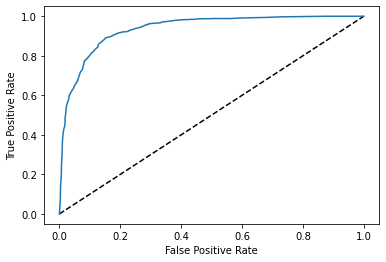

Score: 0.8694723403339697


In [109]:
#Predicting the probability of having 1 in the x-test
y_pred_prob=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score)

## Confusion Matrix

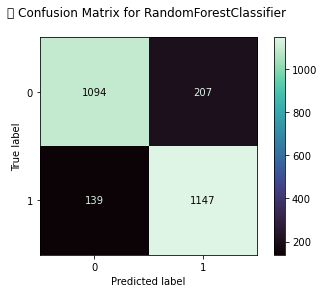

In [114]:
class_names = df.columns
metrics.plot_confusion_matrix(rf.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for RandomForestClassifier \n')
plt.show()

- With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes)

### Saving the model

In [115]:
import pickle


In [116]:
filename='churn analysis.pkl'

In [117]:
pickle.dump(rf,open(filename,'wb'))


In [118]:
#conclusion
loaded_model=pickle.load(open('churn analysis.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.62543486664089


In [119]:
#Conslusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predcited','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586
Predcited,0,1,0,1,1,0,1,1,1,0,...,1,0,0,0,0,1,1,0,1,0
Orignal,0,1,0,1,1,0,1,1,0,0,...,1,0,0,0,0,1,1,0,1,0


## Steps: I Followed in the above Dataset.
- Imported the required libraries

- loaded the dataset and checked for shape,datatype information, columns and checked for null /missing value(if any) and took the neccessary step

- Checked for unique values count and plot a bar of it(count plot)

- Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

- Visulise the relationship between features and label using different plots

- Encoded categorical columns using encoding techniq and convreted object datatype into int datatype

- Found skewness (in continous columns) in dataset so used np.log() method and again chekd for skewness .

- Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated fetures( if any)

- plotted te barplot to visualize the realtionship between label and features(positive and negative)

- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

- Balanced the label column using SMOTE technique

- Scaled the features using StandardScaler

- Found the best random_state and wrote down single function for mulitple model evaluation.

- Evaluate the different models based on score, f1score

- Calculated CV score and selected the best model which had least difference between accuracy and CV score(RandomForestClassifier).

- Hypertuned the parameter using GridsearchCV and again calculated the scores but accuracy score didnot increased for RandomForest(from 0.869 to 0.8604 decreased a bit) Model So I chose the RandomForestCLassifier without Hypertuned parameter(BY default) and Saved the model

- Plotted AUC ROC curve

- printed confusion Matrix

- Saved the model using pickle library

- Compared the predicted and Original values
